In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit as Min
from scipy.integrate import quad as integrate

## Part 1: Estimating statistical precision 

In [2]:
#Limits
min_tau = 0.0
max_tau = 10.0

#Real vals
tau_real = 1.5
V_real = 0.1
delm_real = 20.0

In [3]:
def fac1(V,delm,t):
    if(V == 0):
        return 0.
    return (1+V*np.sin(delm*t))

def fac2(t, tau):
    if(tau == 0):
        return 0.
    return np.exp(-t/tau)

def func(t, V,tau,delm):
    return fac1(V,delm,t)*fac2(t,tau)

def pdf(t,V = V_real,tau = tau_real, delm = delm_real):
    p = func(t,V,tau,delm)
    p[p<=0] = 1e-8
    norm = integrate(func,min_tau,max_tau,args = (V,tau,delm))
    p = p/norm[0]
    return p

def gen_data(N,V = V_real, tau = tau_real, delm = delm_real, tmin = min_tau, tmax = max_tau, dt = 0.001):
    #Setting default limits for t as 0.0 to 10.0(since 1.5 is the expected lifetime)
    ts = np.arange(tmin, tmax, dt)
    probs = pdf(ts, V = V, tau = tau, delm = delm)
    pnorm = np.sum(probs)
    return np.random.choice(ts, p = probs/pnorm, size = N)

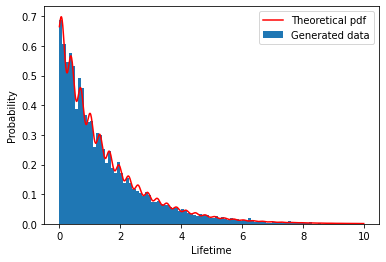

In [4]:
#10,000 samples
gendata1 = gen_data(10000, V = V_real,tau = tau_real, delm = delm_real)
plt.hist(gendata1,density = True,bins = int(np.sqrt(len(gendata1))), label = 'Generated data')
plt.xlabel('Lifetime')
plt.ylabel('Probability')
ts = np.arange(0.0,10.0,0.01)
probs = pdf(ts,V = V_real,tau = tau_real, delm = delm_real)
plt.plot(ts,probs,c = 'r', label = 'Theoretical pdf')
plt.legend()
plt.show()

In [5]:
def min_for_fit1(V,tau,delm):
    return -np.sum(np.log(pdf(gendata1,V = V, tau = tau, delm = delm)))

In [6]:
paramNames = ['V','tau','delm']
start = {
    paramNames[0]:0.5,
    paramNames[1]:2.0,
    paramNames[2]:20.0
    }
minim1 = Min(min_for_fit1,**start)
minim1.errordef = .5
minim1.limits = [(0.0,1.0), (0,5.0), (15,30)]
result1 = minim1.migrad()

In [7]:
result1

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.374e+04                  │              Nfcn = 91               │
│ EDM = 6.34e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V    │   0.107   │   0.014   │            │            │    0    │    1    │       │
│ 1 │ tau  │   1.475   │   0.015   │            │            │    0    │    5    │       │
│ 2 │ delm │   20.08   │   0.08    │            │            │   15    │   30    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────────────────┐
│      │         V       tau      delm │
├──────┼───────────────────────────────┤
│    V │  0.000199  1.04e-05 -4.23e-06 │
│  tau │  1.04e-05   0.00023 -1.38e-06 │
│ delm │ -4.23e-06 -1.38e-06   0.00618 │
└──────┴───────────────────────────────┘

#### Results for 10,000 samples of Monte Carlo generated data:

V =   0.114 $\pm$ 0.014

$\tau$ =  1.526 $\pm$ 0.016

$\Delta$m = 20.00 $\pm$ 0.06

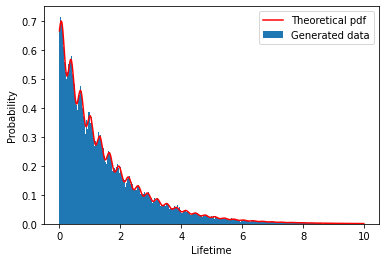

In [8]:
#100,000 samples
gendata2 = gen_data(100000, V = V_real,tau = tau_real, delm = delm_real)
plt.hist(gendata2,density = True,bins = int(np.sqrt(len(gendata2))), label = 'Generated data')
plt.xlabel('Lifetime')
plt.ylabel('Probability')
ts = np.arange(0.0,10.0,0.01)
probs = pdf(ts,V = V_real,tau = tau_real, delm = delm_real)
plt.plot(ts,probs,c = 'r', label = 'Theoretical pdf')
plt.legend()
plt.show()

In [9]:
def min_for_fit2(V,tau,delm):
    return -np.sum(np.log(pdf(gendata2,V = V, tau = tau, delm = delm)))

In [10]:
paramNames = ['V','tau','delm']
start = {
    paramNames[0]:0.5,
    paramNames[1]:2.0,
    paramNames[2]:20.0
    }
minim2 = Min(min_for_fit2,**start)
minim2.errordef = .5
minim2.limits = [(0.0,1.0), (0,5.0), (15,30)]
result2 = minim2.migrad()

In [11]:
result2

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.391e+05                  │              Nfcn = 99               │
│ EDM = 6.09e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V    │   0.103   │   0.004   │            │            │    0    │    1    │       │
│ 1 │ tau  │   1.502   │   0.005   │            │            │    0    │    5    │       │
│ 2 │ delm │  19.975   │   0.022   │            │            │   15    │   30    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬────────────────────────────┐
│      │        V      tau     delm │
├──────┼────────────────────────────┤
│    V │ 2.01e-05 1.05e-06   -7e-07 │
│  tau │ 1.05e-06  2.4e-05 1.91e-08 │
│ delm │   -7e-07 1.91e-08 0.000479 │
└──────┴────────────────────────────┘

#### Results for 100,000 generated samples:

V =   0.100 $\pm$ 0.004

$\tau$ =  1.500 $\pm$ 0.005

$\Delta$m = 20.008 $\pm$ 0.022

#### Comments:

Both data samples(10,000 and 100,000 are able to reproduce the expected values( V = 0.1, $\tau$ = 1.5, $\Delta$m = 20.0 ) to a high degree of accuracy. As would be expected the 100,000 samples produces results with a lower error than the 10,000 sample set.



## Part 2: Estimating possible bias due to time resolution

In [12]:
#gaussian resolution error to generated values, 
#by adding random gaussian noise with sigma = f*tau, mean = 0
#Creating a function to generate the Gaussian noise to add to the data set
def res_err(f, N = 10000):
    #f is the fraction of lifetime defining std of gaussian resolution error
    mean = 0.0
    sigma = f*tau_real
    return np.random.normal(mean,sigma,size = N)

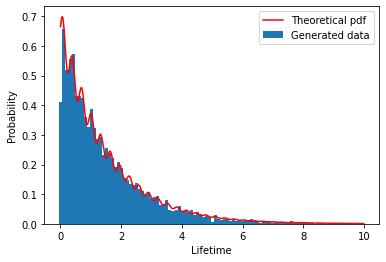

In [13]:
#Resolution error with f = 0.01
gendata3 = gen_data(10000,V = V_real,tau = tau_real,delm = delm_real)
gendata3 = gendata3 + res_err(0.01,N = len(gendata3))
plt.hist(gendata3,density = True,bins = int(np.sqrt(len(gendata3))), label = 'Generated data')
plt.xlabel('Lifetime')
plt.ylabel('Probability')
ts = np.arange(0.0,10.0,0.01)
probs = pdf(ts,V = V_real,tau = tau_real, delm = delm_real)
plt.plot(ts,probs,c = 'r', label = 'Theoretical pdf')
plt.legend()
plt.show()

In [14]:
def min_for_fit3(V,tau,delm):
    return -np.sum(np.log(pdf(gendata3,V = V, tau = tau, delm = delm)))

paramNames = ['V','tau','delm']
start = {
    paramNames[0]:0.5,
    paramNames[1]:2.0,
    paramNames[2]:20.0
    }
minim3 = Min(min_for_fit3,**start)
minim3.errordef = .5
minim3.limits = [(0.0,1.0), (0,5.0), (15,30)]
result3 = minim3.migrad()

In [15]:
result3

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.394e+04                  │              Nfcn = 94               │
│ EDM = 1.19e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V    │   0.094   │   0.014   │            │            │    0    │    1    │       │
│ 1 │ tau  │   1.506   │   0.015   │            │            │    0    │    5    │       │
│ 2 │ delm │   19.99   │   0.07    │            │            │   15    │   30    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────────────────┐
│      │         V       tau      delm │
├──────┼───────────────────────────────┤
│    V │  0.000201  1.06e-05 -1.03e-05 │
│  tau │  1.06e-05  0.000241 -8.15e-08 │
│ delm │ -1.03e-05 -8.15e-08   0.00498 │
└──────┴───────────────────────────────┘

#### Results:

V = 0.098 $\pm$ 0.014

$\tau$ = 1.509 $\pm$ 0.016

$\Delta$m = 20.05 $\pm$ 0.07

#### Discussion:
For f = 0.01, the statistical precision is fairly similar to the expected and observed precision without the resolution error correction

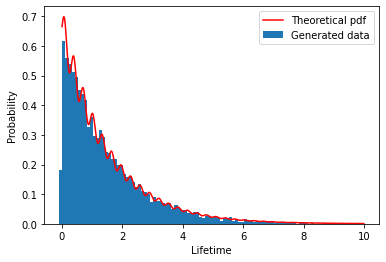

In [16]:
#Resolution error with f = 0.03
gendata4 = gen_data(10000,V = V_real,tau = tau_real,delm = delm_real)
gendata4 = gendata4 + res_err(0.03,N = len(gendata4))
plt.hist(gendata4,density = True,bins = int(np.sqrt(len(gendata4))), label = 'Generated data')
plt.xlabel('Lifetime')
plt.ylabel('Probability')
ts = np.arange(0.0,10.0,0.01)
probs = pdf(ts,V = V_real,tau = tau_real, delm = delm_real)
plt.plot(ts,probs,c = 'r', label = 'Theoretical pdf')
plt.legend()
plt.show()

In [17]:
def min_for_fit4(V,tau,delm):
    return -np.sum(np.log(pdf(gendata4,V = V, tau = tau, delm = delm)))

paramNames = ['V','tau','delm']
start = {
    paramNames[0]:0.5,
    paramNames[1]:2.0,
    paramNames[2]:20.0
    }
minim4 = Min(min_for_fit4,**start)
minim4.errordef = .5
minim4.limits = [(0.0,1.0), (0,5.0), (15,30)]
result4 = minim4.migrad()

In [18]:
result4

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.387e+04                  │              Nfcn = 108              │
│ EDM = 8.21e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V    │   0.033   │   0.014   │            │            │    0    │    1    │       │
│ 1 │ tau  │   1.488   │   0.015   │            │            │    0    │    5    │       │
│ 2 │ delm │   20.10   │   0.15    │            │            │   15    │   30    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────────────────┐
│      │         V       tau      delm │
├──────┼───────────────────────────────┤
│    V │    0.0002  1.06e-05 -2.07e-05 │
│  tau │  1.06e-05  0.000235 -3.05e-06 │
│ delm │ -2.07e-05 -3.05e-06    0.0224 │
└──────┴───────────────────────────────┘

#### Results:

V = 0.043 $\pm$ 0.014

$\tau$ = 1.483 $\pm$ 0.015

$\Delta$m = 20.03 $\pm$ 0.20

#### Discussion:
For f = 0.03, the value for V in particular is much further from the expected value than in the case of f = 0.01, showing that the resolution on this attempt is not high enough.


## Part 3: Estimating a systematic error due to time acceptance

In [19]:
#s values
s_real = 0
s_error = 0.03


In [20]:
def func_acc(t, V,tau,delm,s):
    return fac1(V,delm,t)*fac2(t,tau)*(1+s*t)

def pdf_acc(t,V = V_real,tau = tau_real, delm = delm_real,s = s_real):
    p = func_acc(t,V,tau,delm,s)
    p[p<=0] = 1e-8
    norm = integrate(func_acc,min_tau,max_tau,args = (V,tau,delm,s))
    p = p/norm[0]
    return p

def gen_data_acc(N,V = V_real, tau = tau_real, delm = delm_real,s = s_real, tmin = min_tau, tmax = max_tau, dt = 0.001):
    #Setting default limits for t as 0.0 to 10.0(since 1.5 is the expected lifetime)
    ts = np.arange(tmin, tmax, dt)
    probs = pdf_acc(ts, V = V, tau = tau, delm = delm,s = s)
    pnorm = np.sum(probs)
    return np.random.choice(ts, p = probs/pnorm, size = N)

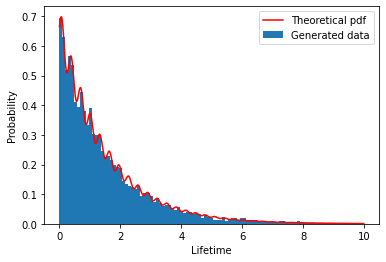

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.383e+04                  │              Nfcn = 89               │
│ EDM = 7.19e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V    │   0.100   │   0.014   │            │            │    0    │    1    │       │
│ 1 │ tau  │   1.489   │   0.015   │            │            │    0    │    5    │       │
│ 2 │ delm │   19.92   │   0.06    │            │            │   15    │   30    │       │
│ 3 │ s    │    0.0    │    0.1    │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────────────────────────────────┐
│      │         V       tau      delm         s │
├──────┼─────────────────────────────────────────┤
│    V │  0.000203  1.06e-05 -6.87e-06         0 │
│  tau │  1.06e-05  0.000235  4.68e-08         0 │
│ delm │ -6.87e-06  4.68e-08   0.00421         0 │
│    s │         0         0         0         0 │
└──────┴─────────────────────────────────────────┘

In [21]:
#Including acceptance factor(base case s = 0)
s1 = s_real
gendata_acc1 = gen_data_acc(10000,s = s1)
plt.hist(gendata_acc1,density = True,bins = int(np.sqrt(len(gendata_acc1))), label = 'Generated data')
plt.xlabel('Lifetime')
plt.ylabel('Probability')
ts = np.arange(0.0,10.0,0.01)
probs = pdf_acc(ts,V = V_real,tau = tau_real, delm = delm_real,s = s1)
plt.plot(ts,probs,c = 'r', label = 'Theoretical pdf')
plt.legend()
plt.show()

def min_for_fit_acc1(V,tau,delm,s):
    return -np.sum(np.log(pdf_acc(gendata_acc1,V = V, tau = tau, delm = delm, s = s)))

paramNames = ['V','tau','delm','s']
start = {
    paramNames[0]:0.5,
    paramNames[1]:2.0,
    paramNames[2]:20.0,
    paramNames[3]:s1
    }
minim_acc1 = Min(min_for_fit_acc1,**start)
minim_acc1.errordef = .5
minim_acc1.limits = [(0.0,1.0), (0,5.0), (15,30), (s1,s1)]
result_acc1 = minim_acc1.migrad()

result_acc1

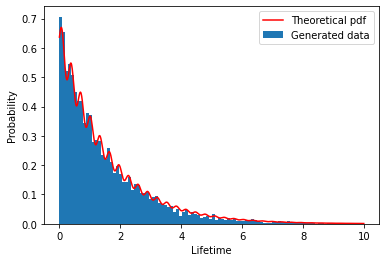

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.383e+04                  │              Nfcn = 81               │
│ EDM = 0.000244 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V    │   0.101   │   0.014   │            │            │    0    │    1    │       │
│ 1 │ tau  │   1.430   │   0.014   │            │            │    0    │    5    │       │
│ 2 │ delm │   20.09   │   0.06    │            │            │   15    │   30    │       │
│ 3 │ s    │  30.0e-3  │  0.3e-3   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────────────────────────────────┐
│      │         V       tau      delm         s │
├──────┼─────────────────────────────────────────┤
│    V │  0.000201  9.68e-06 -9.84e-06         0 │
│  tau │  9.68e-06    0.0002 -1.04e-06         0 │
│ delm │ -9.84e-06 -1.04e-06   0.00317         0 │
│    s │         0         0         0         0 │
└──────┴─────────────────────────────────────────┘

In [22]:
#Including acceptance factor(extreme case s = 0.03)
s2 = s_real+s_error
gendata_acc2 = gen_data_acc(10000)
plt.hist(gendata_acc2,density = True,bins = int(np.sqrt(len(gendata_acc2))), label = 'Generated data')
plt.xlabel('Lifetime')
plt.ylabel('Probability')
ts = np.arange(0.0,10.0,0.01)
probs = pdf_acc(ts,V = V_real,tau = tau_real, delm = delm_real,s = s2)
plt.plot(ts,probs,c = 'r', label = 'Theoretical pdf')
plt.legend()
plt.show()

def min_for_fit_acc2(V,tau,delm,s):
    return -np.sum(np.log(pdf_acc(gendata_acc2,V = V, tau = tau, delm = delm, s = s)))

paramNames = ['V','tau','delm','s']
start = {
    paramNames[0]:0.5,
    paramNames[1]:2.0,
    paramNames[2]:20.0,
    paramNames[3]:s2
    }
minim_acc2 = Min(min_for_fit_acc2,**start)
minim_acc2.errordef = .5
minim_acc2.limits = [(0.0,1.0), (0,5.0), (15,30), (s2,s2)]
result_acc2 = minim_acc2.migrad()

result_acc2

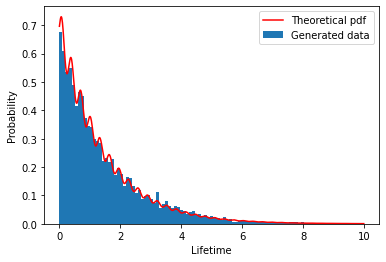

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.39e+04                   │              Nfcn = 94               │
│ EDM = 8.04e-08 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V    │   0.099   │   0.014   │            │            │    0    │    1    │       │
│ 1 │ tau  │   1.578   │   0.017   │            │            │    0    │    5    │       │
│ 2 │ delm │   19.89   │   0.06    │            │            │   15    │   30    │       │
│ 3 │ s    │ -30.0e-3  │  -0.3e-3  │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────────────────────────────────┐
│      │         V       tau      delm         s │
├──────┼─────────────────────────────────────────┤
│    V │  0.000203  1.18e-05 -8.82e-06         0 │
│  tau │  1.18e-05  0.000294 -2.77e-07         0 │
│ delm │ -8.82e-06 -2.77e-07   0.00396         0 │
│    s │         0         0         0         0 │
└──────┴─────────────────────────────────────────┘

In [23]:
#Including acceptance factor(extreme case s = -0.03)
s3 = s_real-s_error
gendata_acc3 = gen_data_acc(10000)
plt.hist(gendata_acc3,density = True,bins = int(np.sqrt(len(gendata_acc3))), label = 'Generated data')
plt.xlabel('Lifetime')
plt.ylabel('Probability')
ts = np.arange(0.0,10.0,0.01)
probs = pdf_acc(ts,V = V_real,tau = tau_real, delm = delm_real,s = s3)
plt.plot(ts,probs,c = 'r', label = 'Theoretical pdf')
plt.legend()
plt.show()

def min_for_fit_acc3(V,tau,delm,s):
    return -np.sum(np.log(pdf_acc(gendata_acc3,V = V, tau = tau, delm = delm, s = s)))

paramNames = ['V','tau','delm','s']
start = {
    paramNames[0]:0.5,
    paramNames[1]:2.0,
    paramNames[2]:20.0,
    paramNames[3]:s3
    }
minim_acc3 = Min(min_for_fit_acc3,**start)
minim_acc3.errordef = .5
minim_acc3.limits = [(0.0,1.0), (0,5.0), (15,30), (s3,s3)]
result_acc3 = minim_acc3.migrad()

result_acc3

#### Tabulated results of a particular run for the s values

| s     | V               | $\tau$            | $\Delta$ m       |
|-------|-----------------|-----------------|----------------|
| 0.0   | 0.106 $\pm$ 0.014 | 1.501 $\pm$ 0.015 | 20.04 $\pm$ 0.07 |
| 0.03  | 0.124 $\pm$ 0.014 | 1.442 $\pm$ 0.014 | 20.01 $\pm$ 0.04 |
| -0.03 | 0.112 $\pm$ 0.014 | 1.611 $\pm$ 0.018 | 19.97 $\pm$ 0.07 |

#### Comments
Just from a single run for each of the three cases(base, positive end of error range, negative end of error range) it can be seen that the values obtained from the fit vary with a change in the s value for the acceptance factor.

The shifts are shown below(assuming the same statistical error for simplicity):

| s     | V                      | $\tau$                | $\Delta$ m           |
|-------|------------------------|-----------------------|----------------------|
| 0.0   | 0                      | 0                     | 0                    |
| 0.03  | 0.124 - 0.106 = 0.018  | 1.501 - 1.442 = 0.059 | 20.04 - 20.01 = 0.03 |
| -0.03 | 0.112 - 0.106 = 0.006  | 1.611 - 1.501 = 0.110 | 20.04 - 19.97 = 0.07 |

The resultant shifts(and therefore systematic errors) are given by the average of the non-zero shifts:

| Variable | V     | $\tau$ | $\Delta$ m |
|----------|-------|--------|------------|
| Shift    | 0.012 | 0.085  |    0.05    |